<a href="https://colab.research.google.com/github/minhquan1910/Traffic_sign_Retinanet/blob/main/Test_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 22.75 MiB/s, done.
Resolving deltas: 100% (4200/4200), done.


In [ ]:
%cd keras-retinanet/

/content/keras-retinanet


In [ ]:
!pip install .

Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=168013 sha256=f1ba7dc54511c38e1877f83e8d3994347a8b861a874dee60db9cffbf55d66439
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=497de33e99bfddffcf8f38f708dcdac0851b277929e7cf7b7e6bd4bb9144b694
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


In [ ]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/keras_retinanet
creating build/temp.linux-x86_64-3.7/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -

In [ ]:
#The training procedure of keras-retinanet works with training models. 
#These are stripped down versions compared to the inference model and only contains the layers necessary for training (regression and classification values). 
#If you wish to do inference on a model (perform object detection on an image), you need to convert the trained model to an inference model.
!python keras_retinanet/bin/convert_model.py resnet50_csv_25.h5 infer_model/resnet50_csv_25.h5

2021-05-03 13:35:00.814821: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-03 13:35:02.772527: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-03 13:35:02.773884: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-03 13:35:02.850052: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-03 13:35:02.850963: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-05-03 13:35:02.851020: I tensorflow/stream_executor/platform/default/dso_lo

Phan tram: 0.9867480993270874


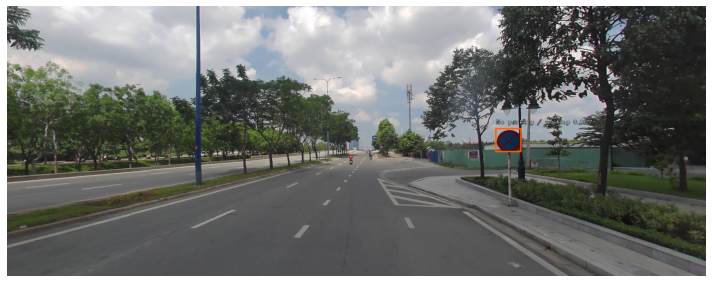

In [ ]:
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
 
model_path = os.path.join('infer_model', 'resnet50_csv_25.h5')
 
# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
 
# load label to names mapping for visualization purposes
labels_to_names = {
    1: "No entry",
    2: "No parking / waiting",
    3: "No turning",
    4: "Max Speed",
    5: "Other prohibition signs",
    6: "Warning",
    7: "Mandatory"
}

# load image
image = read_image_bgr('/content/gdrive/MyDrive/Zalo_Dataset/za_traffic_2020/traffic_public_test/images/0.png')
 
# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
 
# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)
 
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
 
# correct for image scale
boxes /= scale
 
# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
    print('Predict percent: {}'.format(score))
    color = label_color(label)
 
    b = box.astype(int)
    draw_box(draw, b, color=color)
 
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
 
plt.figure(figsize=(10, 5))
plt.axis('off')
plt.imshow(draw)
plt.tight_layout()
plt.show()
